# This is another example of using featurewiz to perform feature selection in a multi-label (multi-target) regression dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import featurewiz as fw

Imported 0.2.8 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
# load the dataset
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data.columns = ['X' + str(i) for i in range(1, 9)] + ['Y1', 'Y2']
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
#Next, I’ll split the dataset into train and test sets:

# split the dataset into train and test sets
X = data.drop(['Y1', 'Y2'], axis=1)
y = data[['Y1', 'Y2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [4]:
#Then, I’ll fit a linear regression model on the original train set and evaluate its performance on the test set:

# fit a linear regression model on the original train set
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = model.predict(X_test)
r2_score_before = r2_score(y_test, y_pred)
print('R-square score before feature selection:', r2_score_before)

#R-square score before feature selection: 0.9027043809921144

R-square score before feature selection: 0.9027043809921144


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Multi_Label Regression problem ####
    Loaded train data. Shape = (614, 10)
#### Multi_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#####################################################################

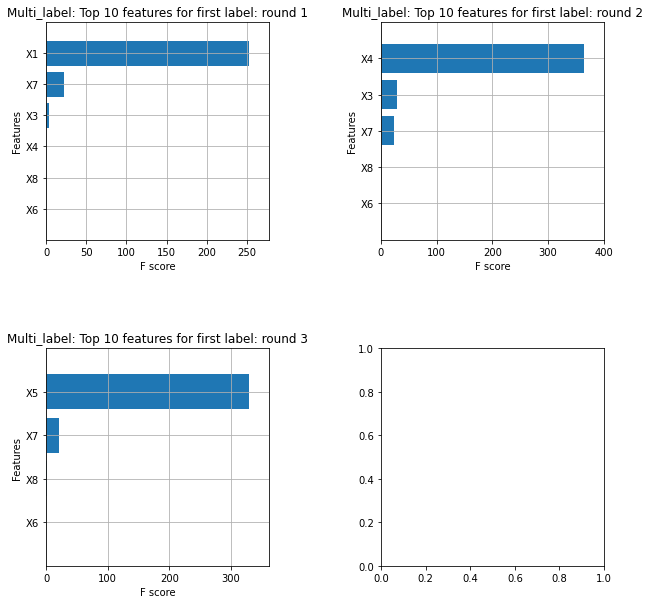

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['X1', 'X7', 'X4', 'X3', 'X5']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 5 important features and a train dataframe
Selected features: ['X1', 'X7', 'X4', 'X3', 'X5']


In [5]:
#Now, I’ll use featurewiz to select the best features from the train set using a single line of code:

# use featurewiz to select the best features from the train set
selected_features, _ = fw.featurewiz(X_train.join(y_train),target=['Y1', 'Y2'], corr_limit=0.7, verbose=2)
print('Selected features:', selected_features)

#Selected features: ['X1', 'X7', 'X4', 'X3', 'X5']

In [6]:
#Finally, I’ll fit another linear regression model on the selected features of the train set and evaluate its performance on the test set:

# fit another linear regression model on the selected features of the train set
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)

# evaluate the model on the test set
y_pred2 = model2.predict(X_test[selected_features])
r2_score_after = r2_score(y_test, y_pred2)
print('R-square score after feature selection:', r2_score_after)

#R-square score after feature selection: 0.9020667726667948

R-square score after feature selection: 0.9020667726667948


# In this very small features dataset, featurewiz was able to reduce the number of features by 38% yet maintain the same R_Square. This shows the power of good feature selection.